## Develop A Neural Network That Can Read Handwriting

In [1]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

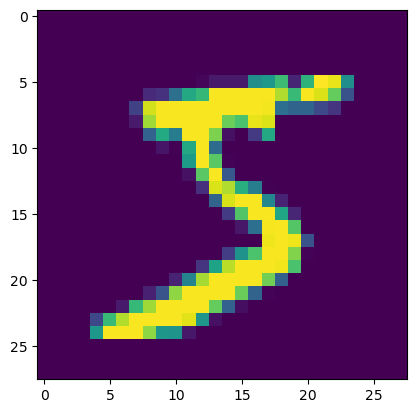

In [7]:
#show the image 
import matplotlib.pyplot as plt 
plt.imshow(X_train[0])

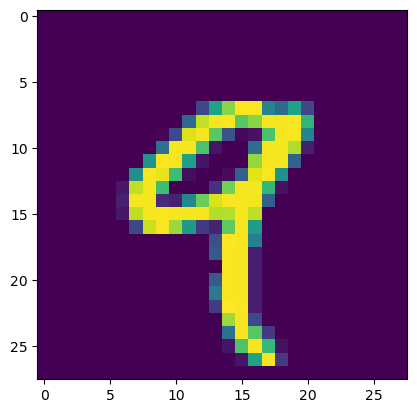

In [8]:
plt.imshow(X_train[4])

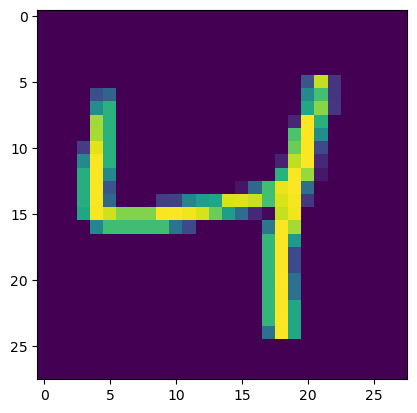

In [9]:
plt.imshow(X_train[2])

 convert my 255 pexels into 0 to 1 range for easy for ANN 

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2843 - accuracy: 0.9187 - val_loss: 0.1612 - val_accuracy: 0.9521
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1247 - accuracy: 0.9636 - val_loss: 0.1211 - val_accuracy: 0.9644
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0867 - accuracy: 0.9742 - val_loss: 0.0974 - val_accuracy: 0.9709
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0651 - accuracy: 0.9808 - val_loss: 0.0971 - val_accuracy: 0.9703
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0888 - val_accuracy: 0.9750
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0391 - accuracy: 0.9884 - val_loss: 0.0875 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0315 - accuracy: 0.9900 - val_loss: 0.0800 - val_accu

In [17]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
y_pred = y_prob.argmax(axis=1)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777

Add one more layer

In [20]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2840 - accuracy: 0.9186 - val_loss: 0.1375 - val_accuracy: 0.9607
Epoch 2/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1190 - accuracy: 0.9647 - val_loss: 0.1168 - val_accuracy: 0.9652
Epoch 3/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0844 - accuracy: 0.9747 - val_loss: 0.1033 - val_accuracy: 0.9685
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.1023 - val_accuracy: 0.9698
Epoch 5/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.0973 - val_accuracy: 0.9718
Epoch 6/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0970 - val_accuracy: 0.9737
Epoch 7/25
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.1029 - val_acc

In [24]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [25]:
y_pred = y_prob.argmax(axis=1)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9747

### ploting the graph

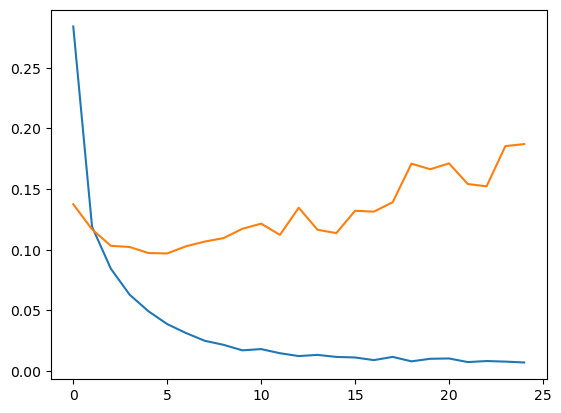

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

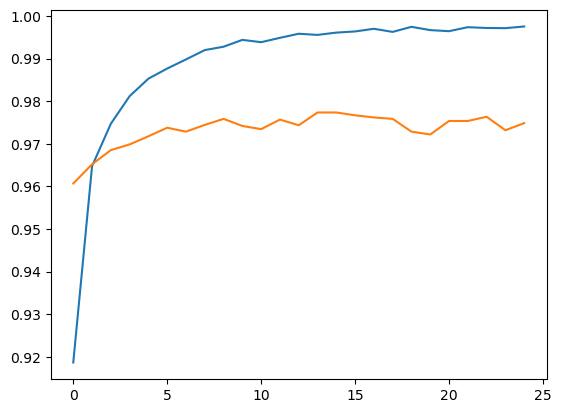

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Prediction

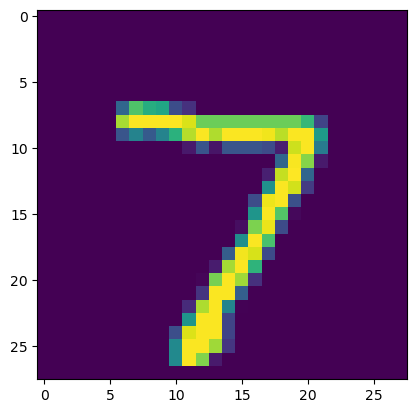

In [29]:
plt.imshow(X_test[0])

In [33]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 49ms/step


array([7], dtype=int64)

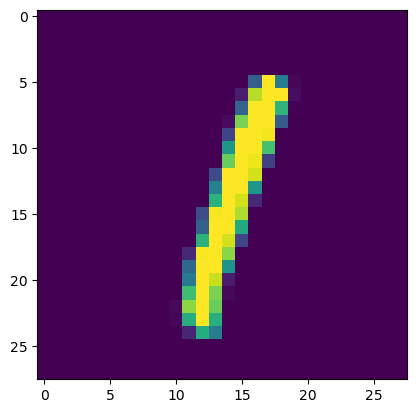

In [34]:
plt.imshow(X_test[5])

In [35]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 46ms/step


array([1], dtype=int64)